# Metadata
```
Name: Maureen O'Shea (mo2cr@virginia.edu)
Course: DS5001
Date: 06 May 2022

Title:   Entropy and Term Length
Description:  This notebook explores the relationship between term length and entropy in corpus

Original Code Author: R.C. Alvarado, Module 03_04 Lab
```

### Set up

In [1]:
OHCO = ['play_code', 'act_num', 'scene_num', 'speech_id', 'speaker','line_num']

In [2]:
data_home = './data'
data_prefix = 'folger'

In [12]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px

In [13]:
sns.set()

### Get Data

In [14]:
TOKEN = pd.read_csv(f'{data_home}/folger-TOKEN2.csv', low_memory=False).set_index(OHCO[:6]).dropna()
VOCAB = pd.read_csv(f'{data_home}/folger-VOCAB.csv', low_memory=False).set_index('term_str').dropna()
LIB = pd.read_csv(f'{data_home}/folger-LIB2.csv', low_memory=False).set_index('play_code').dropna()

In [15]:
TOKEN

token_str     lemma  \
play_code act_num scene_num speech_id speaker    line_num                       
1H4       1       1         1         henryiv    1               So        so   
                                                 1           shaken     shake   
                                                 1               as        as   
                                                 1               we        we   
                                                 1              are        be   
...                                                             ...       ...   
Wiv       5       5         2908      masterford 254          shall     shall   
                                                 254            lie       lie   
                                                 254           with      with   
                                                 254       Mistress  mistress   
                                                 254           Ford      Ford   

                                                              pos  term_str  
play_code act_num scene_num speech_id speaker    line_num                    
1H4       1       1         1         henryiv    1             av        so  
                                                 1            vvn    shaken  
                                                 1         acp-cs        as  
                                                 1            pns        we  
                                                 1            vvb       are  
...                                                           ...       ...  
Wiv       5       5         2908      masterford 254          vmb     shall  
                                                 254          vvi       lie  
                                                 254        acp-p      with  
                                                 254           n1  mistress  
                                                 254        n1-nn      ford  

[593339 rows x 4 columns]

In [16]:
#VOCAB

In [17]:
VOCAB

,n,n_chars,p,i,h,s,max_pos,n_pos,cat_pos,stop
term_str,,,,,,,,,,
the,18480,3,0.031145,5.004839,0.155877,32.107522,d,6,"{'n1', 'pno', 'd', 'po', 'pn', 'acp-p'}",1
and,18452,3,0.031098,5.007027,0.155709,32.156243,cc,5,"{'cs', 'vvz', 'd', 'acp-p', 'cc'}",1
to,13936,2,0.023487,5.411988,0.127112,42.576564,acp-cs,4,"{'acp-av', 'po', 'acp-cs', 'acp-p'}",1
i,13845,1,0.023334,5.421439,0.126502,42.856410,pns,2,"{'pns', 'acp-p'}",1
of,11543,2,0.019454,5.683786,0.110573,51.403188,acp-p,1,{'acp-p'},1
...,...,...,...,...,...,...,...,...,...,...
flaky,1,5,0.000002,19.178517,0.000032,593347.000000,j,1,{'j'},0
undermine,1,9,0.000002,19.178517,0.000032,593347.000000,vvi,1,{'vvi'},0
rabbles,1,7,0.000002,19.178517,0.000032,593347.000000,n1g,1,{'n1g'},0


In [18]:
VOCAB['n_chars'] = VOCAB.index.str.len()
VOCAB['p'] = VOCAB.n / VOCAB.n.sum()
VOCAB['i'] = -np.log2(VOCAB.p)
VOCAB['h'] = VOCAB.p * VOCAB.i
VOCAB['s'] = 1/VOCAB.p

## Long words

In [19]:
VOCAB.sort_values('n_chars', ascending=False).head(20)

,n,n_chars,p,i,h,s,max_pos,n_pos,cat_pos,stop
term_str,,,,,,,,,,
deathcounterfeiting,1,19.0,0.000002,19.178517,0.000032,593347.0,j,1,{'j'},0
wholesomeprofitable,1,19.0,0.000002,19.178517,0.000032,593347.0,j,1,{'j'},0
waitinggentlewoman,1,18.0,0.000002,19.178517,0.000032,593347.0,n1,1,{'n1'},0
honorabledangerous,1,18.0,0.000002,19.178517,0.000032,593347.0,j,1,{'j'},0
deepcontemplative,1,17.0,0.000002,19.178517,0.000032,593347.0,j,1,{'j'},0
alwayswindobeying,1,17.0,0.000002,19.178517,0.000032,593347.0,j,1,{'j'},0
undistinguishable,2,17.0,0.000003,18.178517,0.000061,296673.5,j,1,{'j'},0
peppergingerbread,1,17.0,0.000002,19.178517,0.000032,593347.0,n1,1,{'n1'},0
toomuchmemorable,1,16.0,0.000002,19.178517,0.000032,593347.0,j,1,{'j'},0


## Word lengths

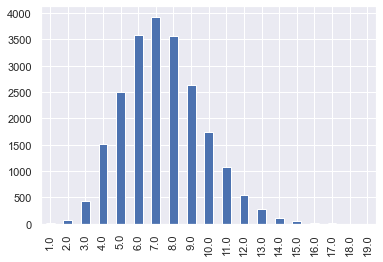

In [20]:
VOCAB.n_chars.value_counts().sort_index().plot.bar();

In [21]:
VOCAB.n_chars.mean()

7.403935080242996

In [22]:
TOKEN[TOKEN['term_str'].apply(lambda x: len(x) >= 16)]

token_str  \
play_code act_num scene_num speech_id speaker            line_num                         
2H6       3       2         1770      warwick            181          well-proportioned   
3H6       2       2         816       clifford           37           great-grandfather   
AYL       2       7         970       jaques             32          deep-contemplative   
          4       3         2222      rosalind           28           freestone-colored   
Cym       3       2         1460      pisanio            5            poisonous-tongued   
Err       1       1         31        egeon              63         always-wind-obeying   
H5        1       1         124       bishopofcanterbury 94           great-grandfather   
                  2         288       henryv             152          great-grandfather   
          2       4         944       kingoffrance       56          too-much-memorable   
Ham       3       1         1874      claudius           187          something-settled   
JC        1       3         539       cassius            129        honorable-dangerous   
Jn        1       1         51        bastard            52            Northamptonshire   
          4       3         2021      bigot              41           precious-princely   
LLL       2       1         557       katherine          57           well-accomplished   
          5       2         2712      king               825       wholesome-profitable   
Lr        3       2         1776      lear               5            thought-executing   
MND       2       1         448       titania            103          undistinguishable   
          3       2         1386      oberon             385       death-counterfeiting   
          4       1         1698      demetrius          194          undistinguishable   
Per       1       2         223       pericles           16           after-nourishment   
R2        1       1         181       mowbray            186        ten-times-barred-up   
                  3         361       hotspur            56         waiting-gentlewoman   
          3       1         1814      hotspur            264         pepper-gingerbread   
R3        1       4         1054      murderers.1        228          gallant-springing   
          5       3         3401      richardiii         63          pursuivant-at-arms   
Tit       2       3         850       lavinia            175         worse-than-killing   
Tmp       4       1         1788      spirits.juno       119          marriage-blessing   
WT        1       2         358       camillo            316          willful-negligent   

                                                                                  lemma  \
play_code act_num scene_num speech_id speaker            line_num                         
2H6       3       2         1770      warwick            181          well-proportioned   
3H6       2       2         816       clifford           37           great-grandfather   
AYL       2       7         970       jaques             32          deep-contemplative   
          4       3         2222      rosalind           28          freestone-coloured   
Cym       3       2         1460      pisanio            5            poisonous-tongued   
Err       1       1         31        egeon              63         always-wind-obeying   
H5        1       1         124       bishopofcanterbury 94           great-grandfather   
                  2         288       henryv             152          great-grandfather   
          2       4         944       kingoffrance       56          too-much-memorable   
Ham       3       1         1874      claudius           187          something-settled   
JC        1       3         539       cassius            129        honorable-dangerous   
Jn        1       1         51        bastard            52            Northamptonshire   
          4       3         2021      bigot              41           pre

# Vocab $V$

## Corpus frequency of terms

Some words are very high frequency, but the vast majority have very low frequencies. We will explore the significane of this difference in the next module.

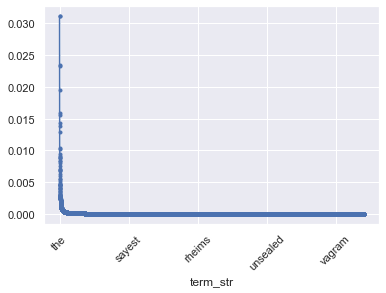

In [23]:
VOCAB.p.sort_values(ascending=False).plot(style='.-', rot=45);

## Frequency of frequencies

The same data, but looked at in terms of the distribition of probabilities. This is so that it can be compared to the following graphs of $s$, $i$, and $h$.

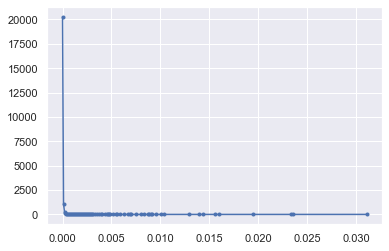

In [24]:
VOCAB.p.round(4).value_counts().sort_index().plot(style='.-');

# Chiasmus Structure of $p$, $s$, $i$, and $h$

$ \Large p \rightarrow s = 1/p \rightarrow i = log(s) \rightarrow h = p i$ 

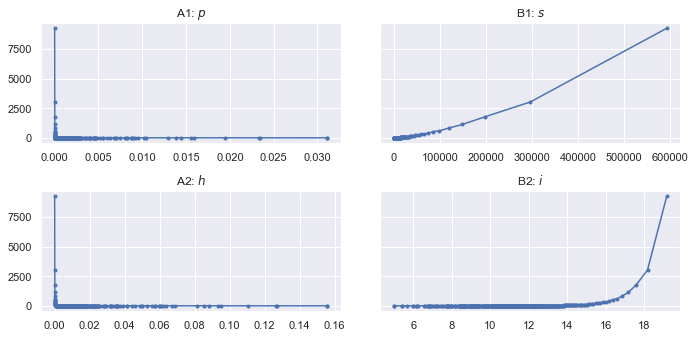

In [25]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10,5), sharey='row')
fig.tight_layout(pad=2)
VOCAB.p.value_counts().sort_index().plot(style='.-', ax=axes[0,0], title="A1: $p$") 
VOCAB.s.value_counts().sort_index().plot(style='.-', ax=axes[0,1], title="B1: $s$")
VOCAB.i.value_counts().sort_index().plot(style='.-', ax=axes[1,1], title="B2: $i$") 
VOCAB.h.value_counts().sort_index().plot(style='.-', ax=axes[1,0], title="A2: $h$");

Note the range of  𝑖 : it is on the same order as the range of n_chars.

# Compare $L$ to $p$, $s$, $i$, and $h$ over types and tokens

Now let's look at how these four features relate to term length $L$, the number of characters in a term (`n_chars`)

## Create a dataframe for $L$

In [26]:
VG = VOCAB.groupby('n_chars')

In [27]:
# Distribution of L over the vocabulary (types)
L = VG.n.count().to_frame('v_n')
L['v_p'] = L.v_n / L.v_n.sum()
L['v_s'] = 1 / L.v_p
L['v_i'] = np.log2(L.v_s)
L['v_h'] = L.v_p * L.v_i

# Distribution of L over the corpus (tokens)
L['k_n'] = VG.n.sum()
L['k_p'] = L.k_n / L.k_n.sum()
L['k_s'] = 1 / L.k_p
L['k_i'] = np.log2(L.k_s)
L['k_h'] = L.k_p * L.k_i

# Aggregate probability features over tokens
for func in ['sum','mean']:
    for x in 'psih':
        L[f"k{func}_{x}"] = VG[x].agg(func)    
        
# L.index.name = 'n_chars'        
L.columns = pd.Index([tuple(col.split('_')) for col in L.columns])
L.T.index.names = ['pop','stat']
Lnorm = (L - L.mean()) / L.std()

In [28]:
L.style.background_gradient(cmap='YlGnBu')

In [29]:
L['v'].style.background_gradient(cmap='YlGnBu')

stat,n,p,s,i,h
n_chars,,,,,
1.0,12,0.000544,1838.166667,10.844052,0.005899
2.0,67,0.003037,329.223881,8.362925,0.025402
3.0,428,0.019403,51.537383,5.687547,0.110358
4.0,1507,0.068320,14.637027,3.871551,0.264504
5.0,2505,0.113564,8.805589,3.138419,0.356412
6.0,3585,0.162526,6.152859,2.621257,0.426023
7.0,3934,0.178348,5.607016,2.487233,0.443593
8.0,3561,0.161438,6.194327,2.630948,0.424735
9.0,2636,0.119503,8.367982,3.064880,0.366263


In [30]:
L['k'].style.background_gradient(cmap='YlGnBu')

stat,n,p,s,i,h
n_chars,,,,,
1.0,25397,0.042804,23.362563,4.546127,0.194590
2.0,103364,0.174207,5.740287,2.521123,0.439198
3.0,128165,0.216006,4.629493,2.210854,0.477559
4.0,141035,0.237697,4.207034,2.072803,0.492699
5.0,73421,0.123742,8.081326,3.014592,0.373032
6.0,45781,0.077158,12.960377,3.696036,0.285180
7.0,34229,0.057689,17.334395,4.115566,0.237422
8.0,20539,0.034616,28.888407,4.852419,0.167971
9.0,11357,0.019141,52.244343,5.707203,0.109241


## $L$ distributions over Types and Tokens

Compare corpus (token) and vocab (type) frequencies. Why are the distributions different?

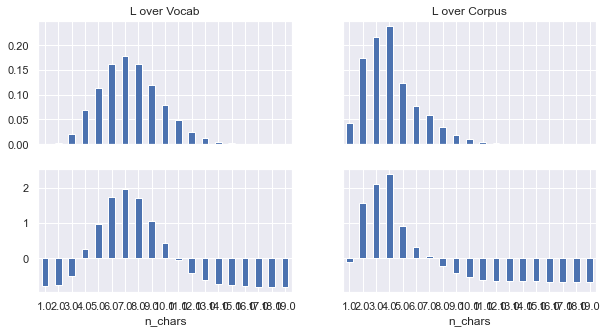

In [31]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey='row', figsize=(10,5))
L.v.p.plot.bar( ax=axes[0,0], title='L over Vocab')
L.k.p.plot.bar( ax=axes[0,1], title='L over Corpus')
Lnorm.v.p.plot.bar( ax=axes[1,0], rot=0)
Lnorm.k.p.plot.bar( ax=axes[1,1], rot=0);

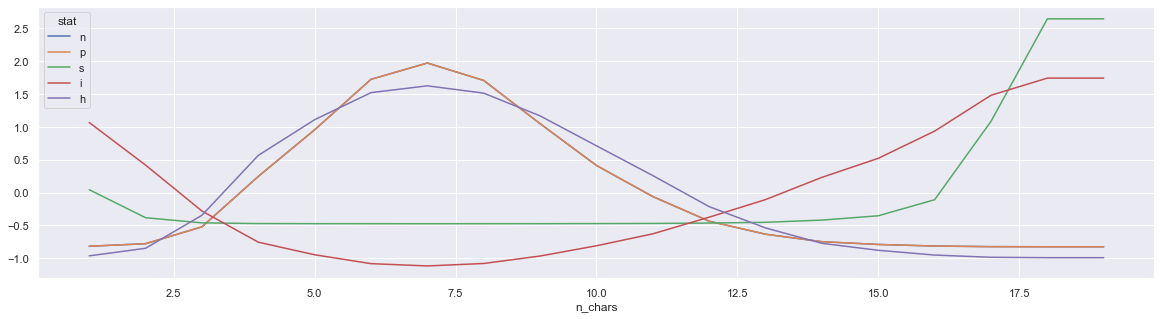

In [32]:
Lnorm.v.plot(figsize=(20,5));

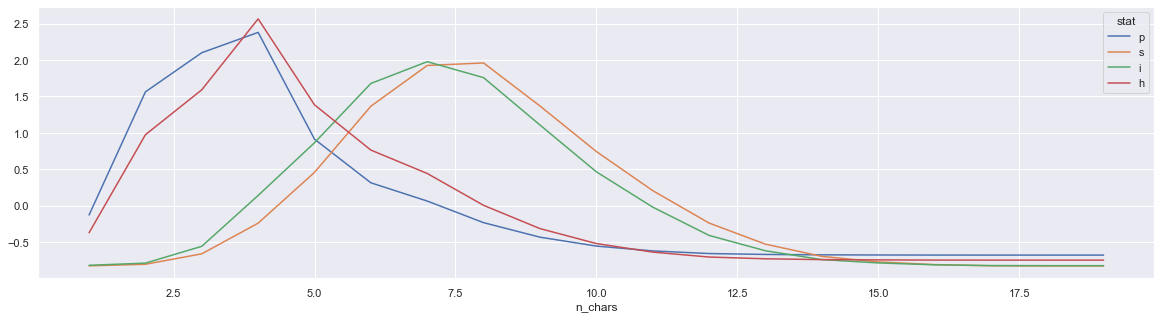

In [33]:
Lnorm.ksum.plot(figsize=(20,5));

In [34]:
VOCAB.corr().stack().to_frame('c').loc[('n_chars','i')]

c    0.380021
Name: (n_chars, i), dtype: float64

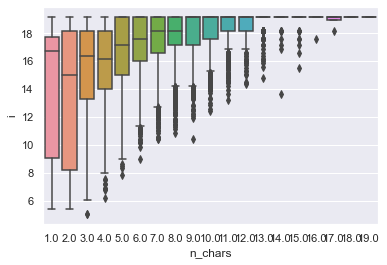

In [35]:
sns.boxplot(data=VOCAB.reset_index(), x='n_chars', y='i');

## Plot All

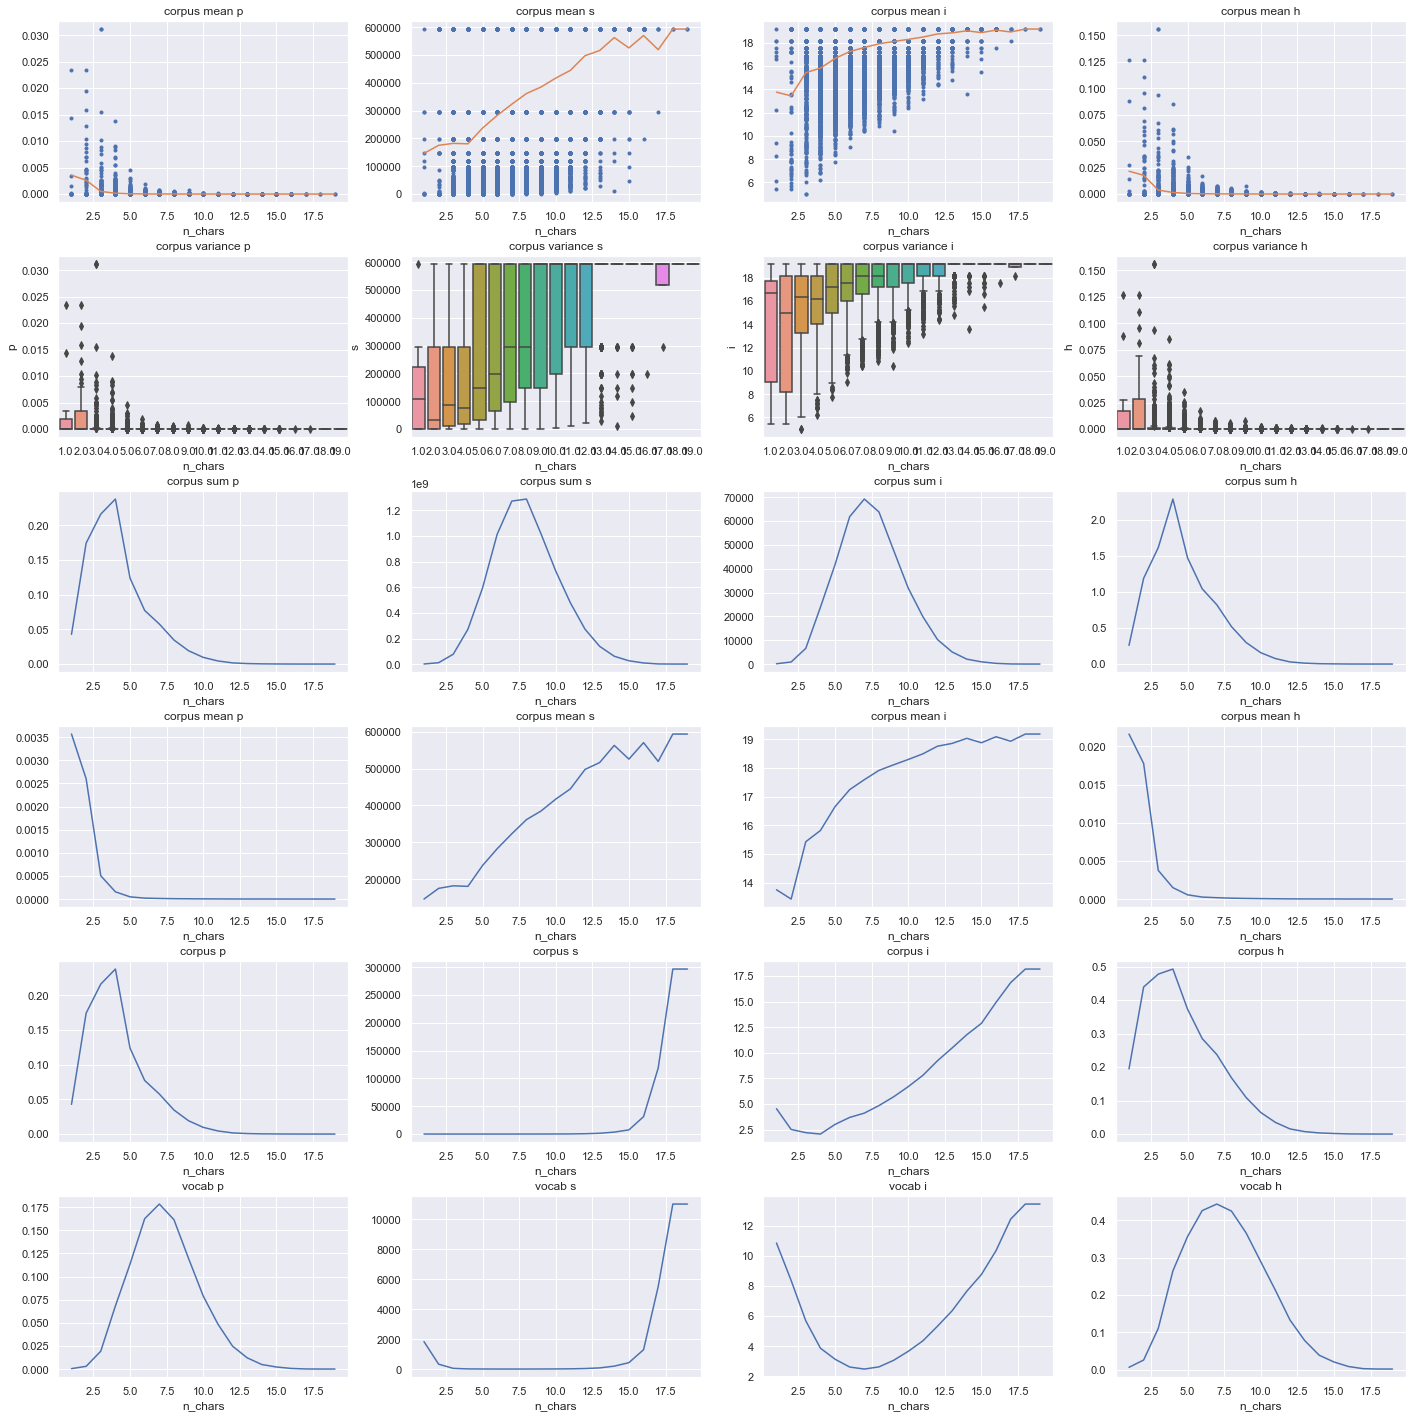

In [36]:
V = VOCAB

fig, axes = plt.subplots(ncols=4, nrows=6, figsize=(20,20), sharex=False)
fig.tight_layout(pad=2.5)
for i, x in enumerate(list("psih")):
    
#     ax = axes[0, i]
    
#     # Counts 
#     V[x].value_counts().plot(style='*-', ax=ax)
#     ax.set_title(f"${x}$")    

    ax = axes[0, i]
    
    # Means and points
    V.plot('n_chars', x, style='.', ax=ax, legend=False)
    L.kmean[x].plot(ax=ax);
    ax.set_title(f'corpus mean {x}')

    ax = axes[1, i]
    
    # Variances 
    sns.boxplot(data=V.reset_index(), x='n_chars', y=x, ax=ax)
    ax.set_title(f'corpus variance {x}')

    ax = axes[2, i]

    # Ksum
    L.ksum[x].plot(ax=ax)
    ax.set_title(f'corpus sum {x}')
    
    ax = axes[3, i]
    
    # Kmean
    L.kmean[x].plot(ax=ax)
    ax.set_title(f"corpus mean {x}")

    ax = axes[4, i]
    
    # K
    L.k[x].plot(ax=ax)
    ax.set_title(f"corpus {x}")

    ax = axes[5, i]
    
    # V
    L.v[x].plot(ax=ax)
    ax.set_title(f"vocab {x}")

In [37]:
def plot_chiasmus(df, kind='bar'):
    fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10,6), sharex=True)
    fig.tight_layout()
    df.p.plot(kind=kind, ax=axes[0,0], title='P')
    df.s.plot(kind=kind, ax=axes[0,1], title='S')
    df.i.plot(kind=kind, ax=axes[1,1], title='I', rot=0)
    df.h.plot(kind=kind, ax=axes[1,0], title='H', rot=0)

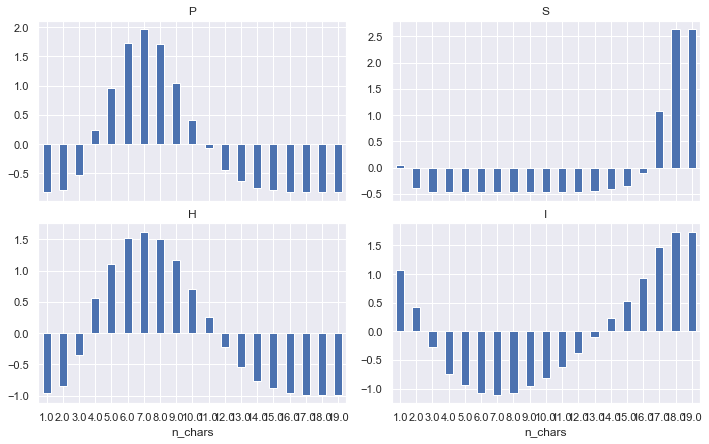

In [38]:
plot_chiasmus(Lnorm.v, 'bar')

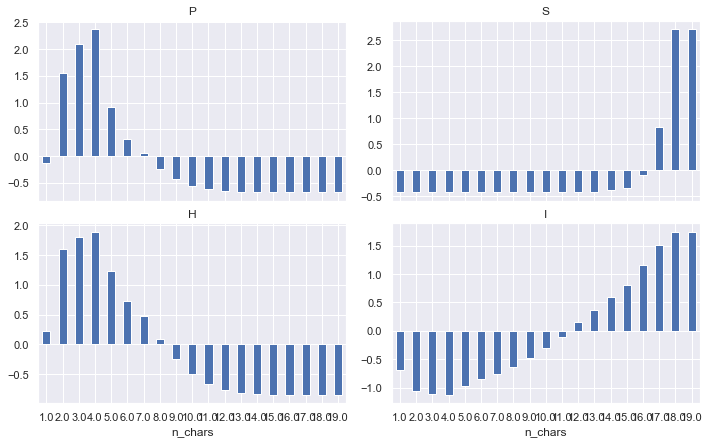

In [39]:
plot_chiasmus(Lnorm.k, 'bar')

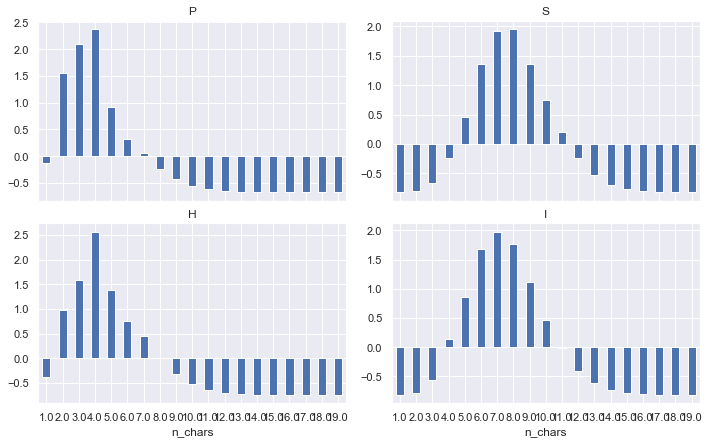

In [40]:
plot_chiasmus(Lnorm.ksum, 'bar')

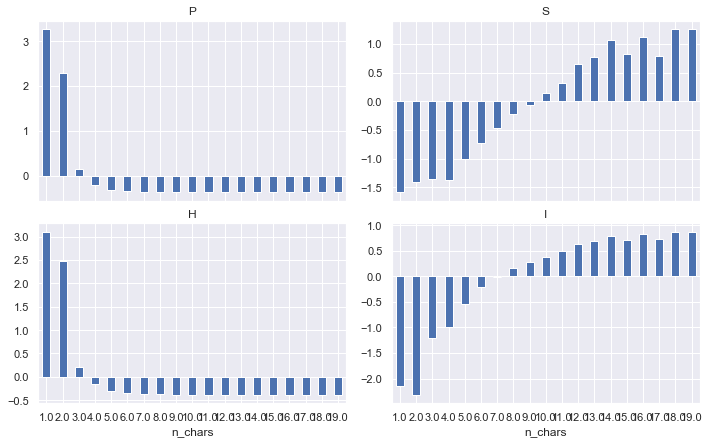

In [41]:
plot_chiasmus(Lnorm.kmean, 'bar')

# Conclusions

* All high frequency, low information terms are short.
* Average term length increase with information.
* Information and term length in fact have the same scale! They are weakly correlated;
  * Characters as units of information.
* $s$ or $i$ can be used to cull significant terms.

# Explore Term Length Vector Space 

Can we learn anything about the structure of our corpus from distribution of term lengths? If information is related to length, there must be something to observe.

In [42]:
import sys; sys.path.append('./lib')
from hac import HAC

In [43]:
TOKEN['n_chars'] = TOKEN.term_str.str.len()

In [44]:
T1 = TOKEN.groupby(OHCO[:3]+['n_chars']).n_chars.count().unstack(fill_value=0)

T2 = (T1.T / T1.T.sum()).T

T3 = T2.corr().stack().sort_values().to_frame('c')
T3.index.names = ['x','y']
T3 = T3[T3.apply(lambda x: x.name[0] > x.name[1], 1)]
T3 = T3.sort_values('c', ascending=False)

In [45]:
T1

n_chars                      1    2    3    4    5    6    7   8   9   10  11  \
play_code act_num scene_num                                                     
1H4       1       1          40  230  252  262  175   94   83  54  41  11  14   
                  2           0    9    7   12   10    6    2   2   0   2   0   
                  3          72  331  342  393  227  119  113  67  42  21  12   
          2       1           0    1    1    4    3    0    0   0   0   0   0   
                  2           0    4    4    4    2    2    2   1   0   2   0   
...                          ..  ...  ...  ...  ...  ...  ...  ..  ..  ..  ..   
Wiv       4       2           1    6   12    7   10    1    0   0   0   0   0   
                  4          14  109  137  137   79   38   34  19   4   8   1   
                  6          12   72   89   97   52   33   29  14   7   3   1   
          5       3           0    2    1    3    2    1    2   0   2   0   0   
                  5          10   53   99   94   60   33   22  12   6   5   1   

n_chars                      12  13  14  15  16  17  18  19  
play_code act_num scene_num                                  
1H4       1       1           5   5   2   1   0   0   0   0  
                  2           0   0   0   0   0   0   0   0  
                  3           5   0   2   1   0   0   0   0  
          2       1           0   0   0   0   0   0   0   0  
                  2           0   0   0   0   0   0   0   0  
...                          ..  ..  ..  ..  ..  ..  ..  ..  
Wiv       4       2           0   0   0   0   0   0   0   0  
                  4           0   1   0   0   0   0   0   0  
                  6           0   0   0   0   0   0   0   0  
          5       3           0   0   0   0   0   0   0   0  
                  5           1   0   0   0   0   0   0   0  

[743 rows x 19 columns]

In [46]:
T2

n_chars                            1         2         3         4         5   \
play_code act_num scene_num                                                     
1H4       1       1          0.031521  0.181245  0.198582  0.206462  0.137904   
                  2          0.000000  0.180000  0.140000  0.240000  0.200000   
                  3          0.041214  0.189468  0.195764  0.224957  0.129937   
          2       1          0.000000  0.111111  0.111111  0.444444  0.333333   
                  2          0.000000  0.190476  0.190476  0.190476  0.095238   
...                               ...       ...       ...       ...       ...   
Wiv       4       2          0.027027  0.162162  0.324324  0.189189  0.270270   
                  4          0.024096  0.187608  0.235800  0.235800  0.135972   
                  6          0.029340  0.176039  0.217604  0.237164  0.127139   
          5       3          0.000000  0.153846  0.076923  0.230769  0.153846   
                  5          0.025253  0.133838  0.250000  0.237374  0.151515   

n_chars                            6         7         8         9         10  \
play_code act_num scene_num                                                     
1H4       1       1          0.074074  0.065406  0.042553  0.032309  0.008668   
                  2          0.120000  0.040000  0.040000  0.000000  0.040000   
                  3          0.068117  0.064682  0.038351  0.024041  0.012021   
          2       1          0.000000  0.000000  0.000000  0.000000  0.000000   
                  2          0.095238  0.095238  0.047619  0.000000  0.095238   
...                               ...       ...       ...       ...       ...   
Wiv       4       2          0.027027  0.000000  0.000000  0.000000  0.000000   
                  4          0.065404  0.058520  0.032702  0.006885  0.013769   
                  6          0.080685  0.070905  0.034230  0.017115  0.007335   
          5       3          0.076923  0.153846  0.000000  0.153846  0.000000   
                  5          0.083333  0.055556  0.030303  0.015152  0.012626   

n_chars                            11        12        13        14        15  \
play_code act_num scene_num                                                     
1H4       1       1          0.011032  0.003940  0.003940  0.001576  0.000788   
                  2          0.000000  0.000000  0.000000  0.000000  0.000000   
                  3          0.006869  0.002862  0.000000  0.001145  0.000572   
          2       1          0.000000  0.000000  0.000000  0.000000  0.000000   
                  2          0.000000  0.000000  0.000000  0.000000  0.000000   
...                               ...       ...       ...       ...       ...   
Wiv       4       2          0.000000  0.000000  0.000000  0.000000  0.000000   
                  4          0.001721  0.000000  0.001721  0.000000  0.000000   
                  6          0.002445  0.000000  0.000000  0.000000  0.000000   
          5       3          0.000000  0.000000  0.000000  0.000000  0.000000   
                  5          0.002525  0.002525  0.000000  0.000000  0.000000   

n_chars                       16   17   18   19  
play_code act_num scene_num                      
1H4       1       1          0.0  0.0  0.0  0.0  
                  2          0.0  0.0  0.0  0.0  
                  3          0.0  0.0  0.0  0.0  
          2       1          0.0  0.0  0.0  0.0  
                  2          0.0  0.0  0.0  0.0  
...                          ...  ...  ...  ...  
Wiv       4       2          0.0  0.0  0.0  0.0  
                  4          0.0  0.0  0.0  0.0  
                  6          0.0  0.0  0.0  0.0  
          5       3          0.0  0.0  0.0  0.0  
                  5          0.0  0.0  0.0  0.0  

[743 rows x 19 columns]

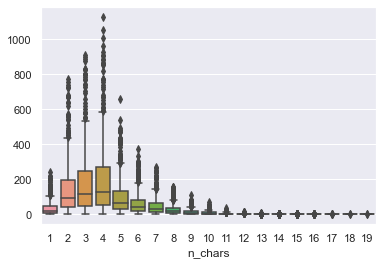

In [47]:
sns.boxplot(data=T1);

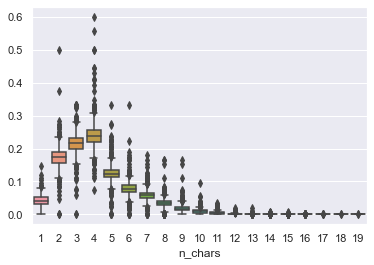

In [48]:
sns.boxplot(data=T2);